In [1]:
import os

from glob import glob
from os.path import basename, exists, join
import pandas as pd
from src.config import ROOT_DIR, RESULTS
import pickle
os.chdir(ROOT_DIR)

import seaborn as sns
import matplotlib.pyplot as plt
from src.external.pyvenn import venn

Project Directory: /data2/mito_lineage


In [2]:
outdir = "data/processed/2020_09_07_Croker_mito"
outdir_cov = join(outdir, "coverage")
if not exists(outdir):
    os.mkdir(outdir)
    
if not exists(outdir_cov):
    os.mkdir(outdir_cov)

In [3]:
samples = pd.read_csv("parameters/2020_09_07_Croker_mito.csv")
samples

,sample,raw,bam,bam_f
0,CD34_Flt3L_mt_PolydT,NaN,NaN,/data2/isshamie/mito_lineage/data/processed/20...
1,CD34_Flt3L_PolydT,NaN,NaN,/data2/isshamie/mito_lineage/data/processed/20...
2,CD34_Flt3L_mt,NaN,NaN,/data2/isshamie/mito_lineage/data/processed/20...
3,CD34_mt_PolydT,NaN,NaN,/data2/isshamie/mito_lineage/data/processed/20...
4,CD34_mt,NaN,NaN,/data2/isshamie/mito_lineage/data/processed/20...
5,CD34_PolydT,NaN,NaN,/data2/isshamie/mito_lineage/data/processed/20...
6,PBMC_mt,NaN,NaN,/data2/isshamie/mito_lineage/data/processed/20...
7,PBMC_mt_PolydT,NaN,NaN,/data2/isshamie/mito_lineage/data/processed/20...


### Parameters

In [4]:
mapq = 30

## Load barcodes for each sample

In [5]:

samples['cellr_barcode_raw_f'] = ""
samples['cellr_barcode_filt_f'] = ""
samples["cb_barcode_f"] = ''
samples["cov_f"] = ''

for ind, val in samples.iterrows():
    bc_f = (os.path.join(os.path.dirname(val['bam_f']),"raw_feature_bc_matrix","barcodes.tsv.gz"))
    samples.at[ind,'cellr_barcode_raw_f'] = (os.path.join(os.path.dirname(val['bam_f']),"raw_feature_bc_matrix","barcodes.tsv.gz"))
    samples.at[ind,'cellr_barcode_filt_f'] = (os.path.join(os.path.dirname(val['bam_f']),"filtered_feature_bc_matrix","barcodes.tsv.gz"))
    samples.at[ind,"cov_f"] =  join(RESULTS, "mttrace", val['sample'], f'mapq_{mapq}', 'scPileup_concat_200', val['sample'] + '_200_all.coverage.txt.gz')
    samples.at[ind,"cb_barcode_f"] = join(RESULTS, "mttrace", val['sample'], f'mapq_{mapq}',f"{val['sample']}_barcode_data.p")
    samples.at[ind,"venn_out_f"] = join("figures", "mttrace", val['sample'],f'mapq_{mapq}', "barcode_overlap.png")
                                              
#raw_bc_matrix = pd.read_csv(bc_f,sep='\t', header=None)
#raw_bc_matrix
samples

,sample,raw,bam,bam_f,cellr_barcode_raw_f,cellr_barcode_filt_f,cb_barcode_f,cov_f,venn_out_f
0,CD34_Flt3L_mt_PolydT,NaN,NaN,/data2/isshamie/mito_lineage/data/processed/20...,/data2/isshamie/mito_lineage/data/processed/20...,/data2/isshamie/mito_lineage/data/processed/20...,/data2/mito_lineage/data/processed/mttrace/CD3...,/data2/mito_lineage/data/processed/mttrace/CD3...,figures/mttrace/CD34_Flt3L_mt_PolydT/mapq_30/b...
1,CD34_Flt3L_PolydT,NaN,NaN,/data2/isshamie/mito_lineage/data/processed/20...,/data2/isshamie/mito_lineage/data/processed/20...,/data2/isshamie/mito_lineage/data/processed/20...,/data2/mito_lineage/data/processed/mttrace/CD3...,/data2/mito_lineage/data/processed/mttrace/CD3...,figures/mttrace/CD34_Flt3L_PolydT/mapq_30/barc...
2,CD34_Flt3L_mt,NaN,NaN,/data2/isshamie/mito_lineage/data/processed/20...,/data2/isshamie/mito_lineage/data/processed/20...,/data2/isshamie/mito_lineage/data/processed/20...,/data2/mito_lineage/data/processed/mttrace/CD3...,/data2/mito_lineage/data/processed/mttrace/CD3...,figures/mttrace/CD34_Flt3L_mt/mapq_30/barcode_...
3,CD34_mt_PolydT,NaN,NaN,/data2/isshamie/mito_lineage/data/processed/20...,/data2/isshamie/mito_lineage/data/processed/20...,/data2/isshamie/mito_lineage/data/processed/20...,/data2/mito_lineage/data/processed/mttrace/CD3...,/data2/mito_lineage/data/processed/mttrace/CD3...,figures/mttrace/CD34_mt_PolydT/mapq_30/barcode...
4,CD34_mt,NaN,NaN,/data2/isshamie/mito_lineage/data/processed/20...,/data2/isshamie/mito_lineage/data/processed/20...,/data2/isshamie/mito_lineage/data/processed/20...,/data2/mito_lineage/data/processed/mttrace/CD3...,/data2/mito_lineage/data/processed/mttrace/CD3...,figures/mttrace/CD34_mt/mapq_30/barcode_overla...
5,CD34_PolydT,NaN,NaN,/data2/isshamie/mito_lineage/data/processed/20...,/data2/isshamie/mito_lineage/data/processed/20...,/data2/isshamie/mito_lineage/data/processed/20...,/data2/mito_lineage/data/processed/mttrace/CD3...,/data2/mito_lineage/data/processed/mttrace/CD3...,figures/mttrace/CD34_PolydT/mapq_30/barcode_ov...
6,PBMC_mt,NaN,NaN,/data2/isshamie/mito_lineage/data/processed/20...,/data2/isshamie/mito_lineage/data/processed/20...,/data2/isshamie/mito_lineage/data/processed/20...,/data2/mito_lineage/data/processed/mttrace/PBM...,/data2/mito_lineage/data/processed/mttrace/PBM...,figures/mttrace/PBMC_mt/mapq_30/barcode_overla...
7,PBMC_mt_PolydT,NaN,NaN,/data2/isshamie/mito_lineage/data/processed/20...,/data2/isshamie/mito_lineage/data/processed/20...,/data2/isshamie/mito_lineage/data/processed/20...,/data2/mito_lineage/data/processed/mttrace/PBM...,/data2/mito_lineage/data/processed/mttrace/PBM...,figures/mttrace/PBMC_mt_PolydT/mapq_30/barcode...


(2233,)


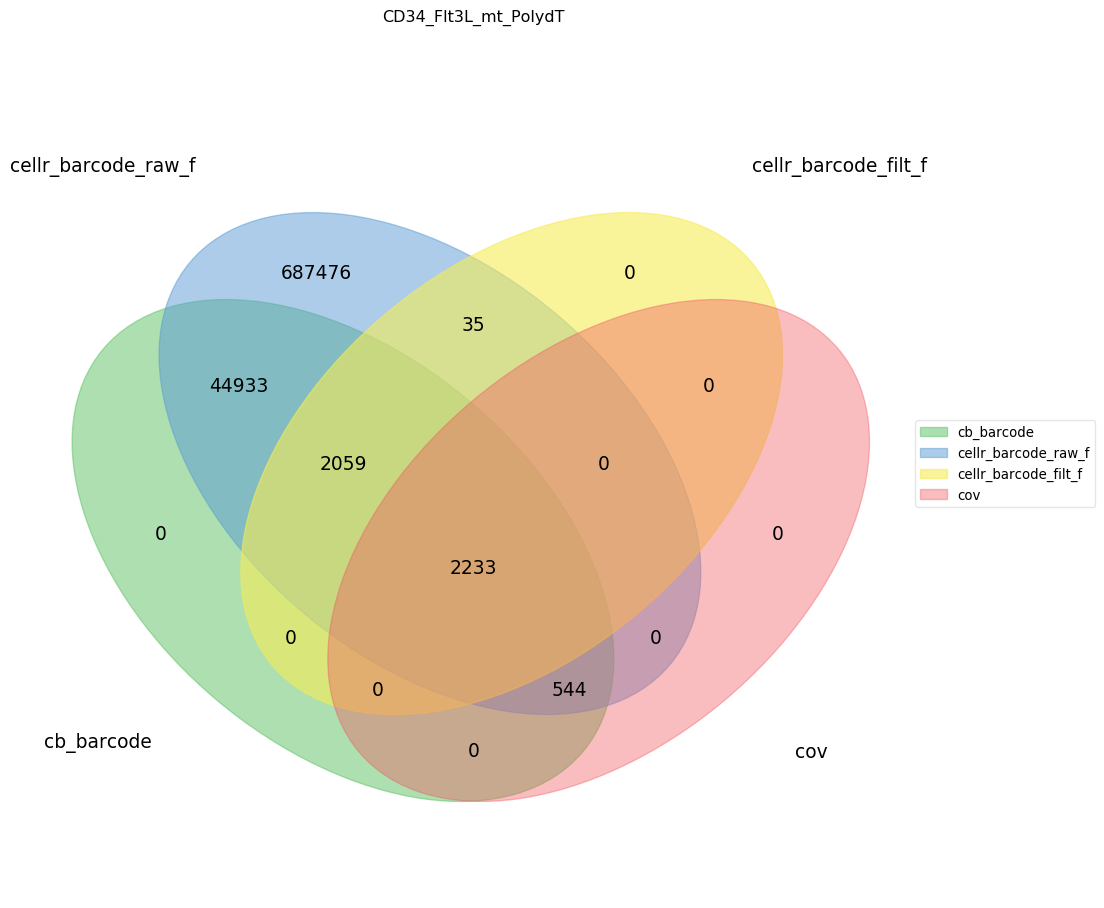

(4100,)


<Figure size 432x288 with 0 Axes>

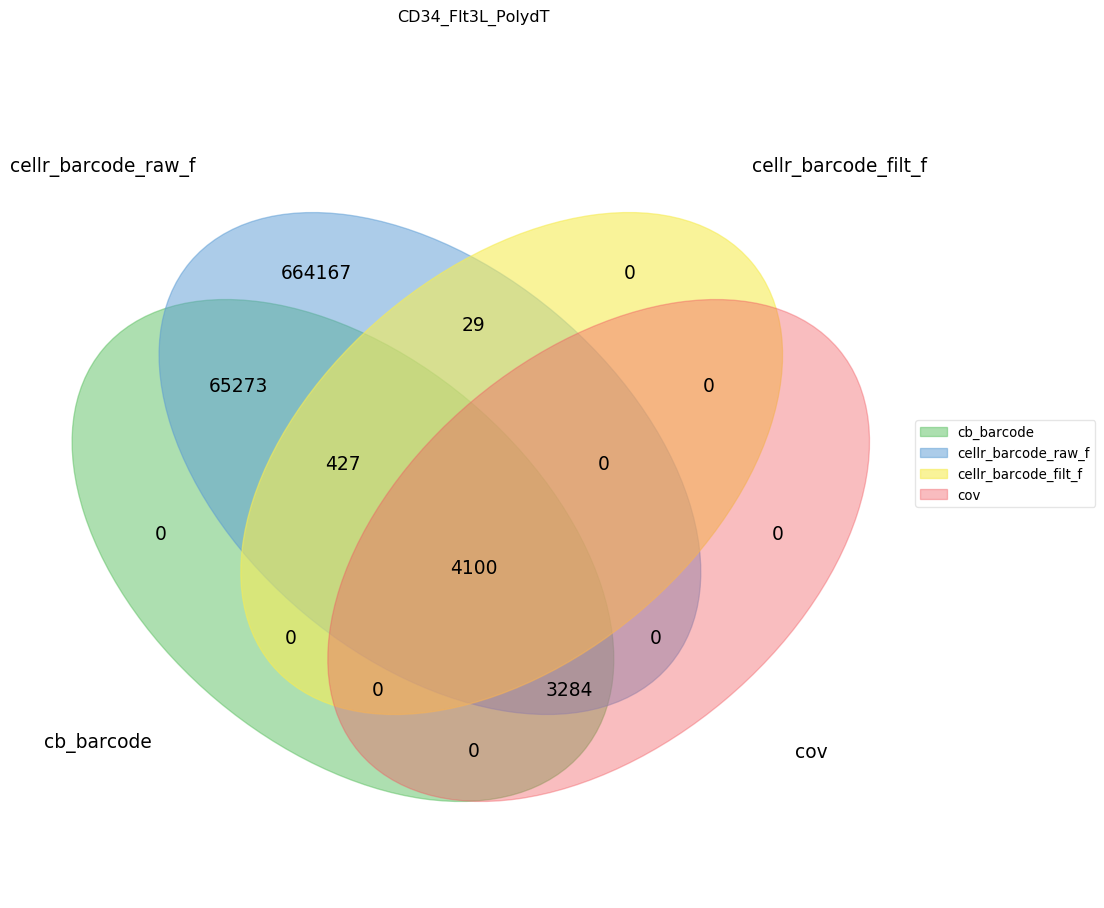

(833,)


<Figure size 432x288 with 0 Axes>

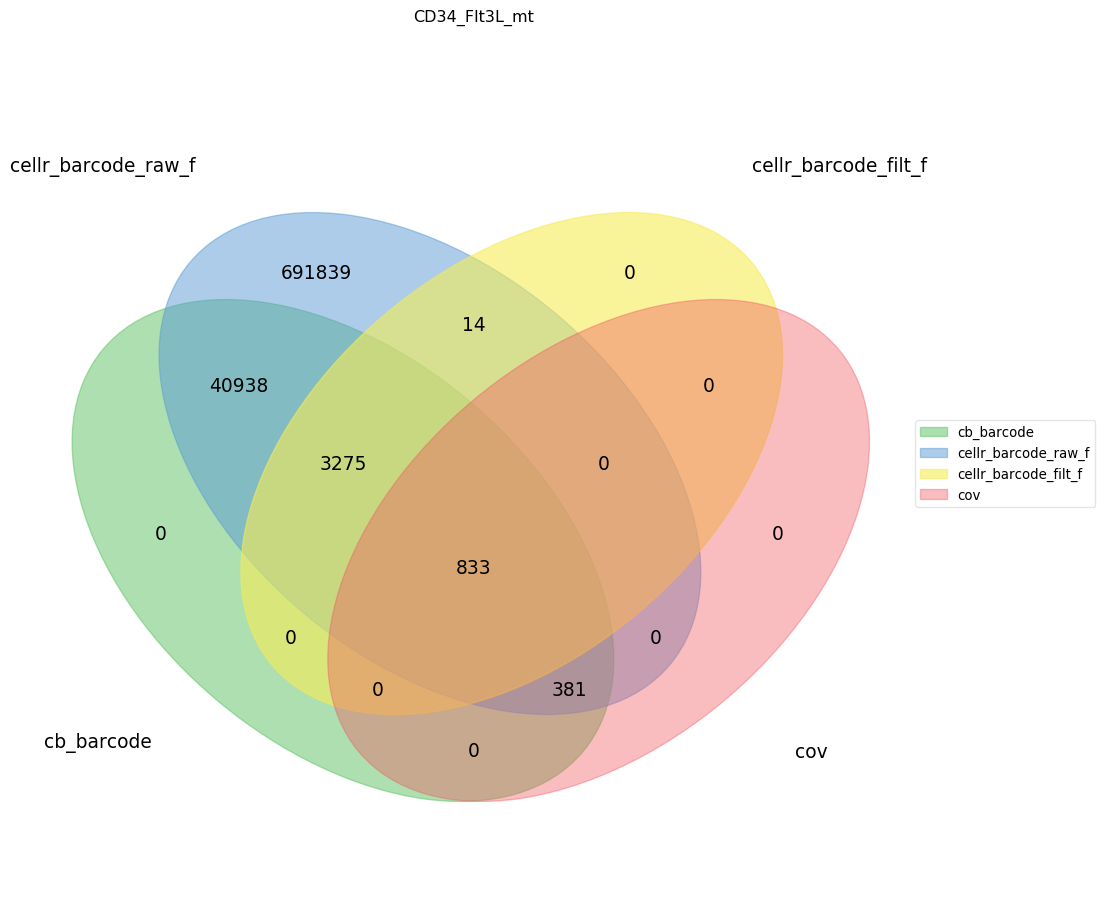

(848,)


<Figure size 432x288 with 0 Axes>

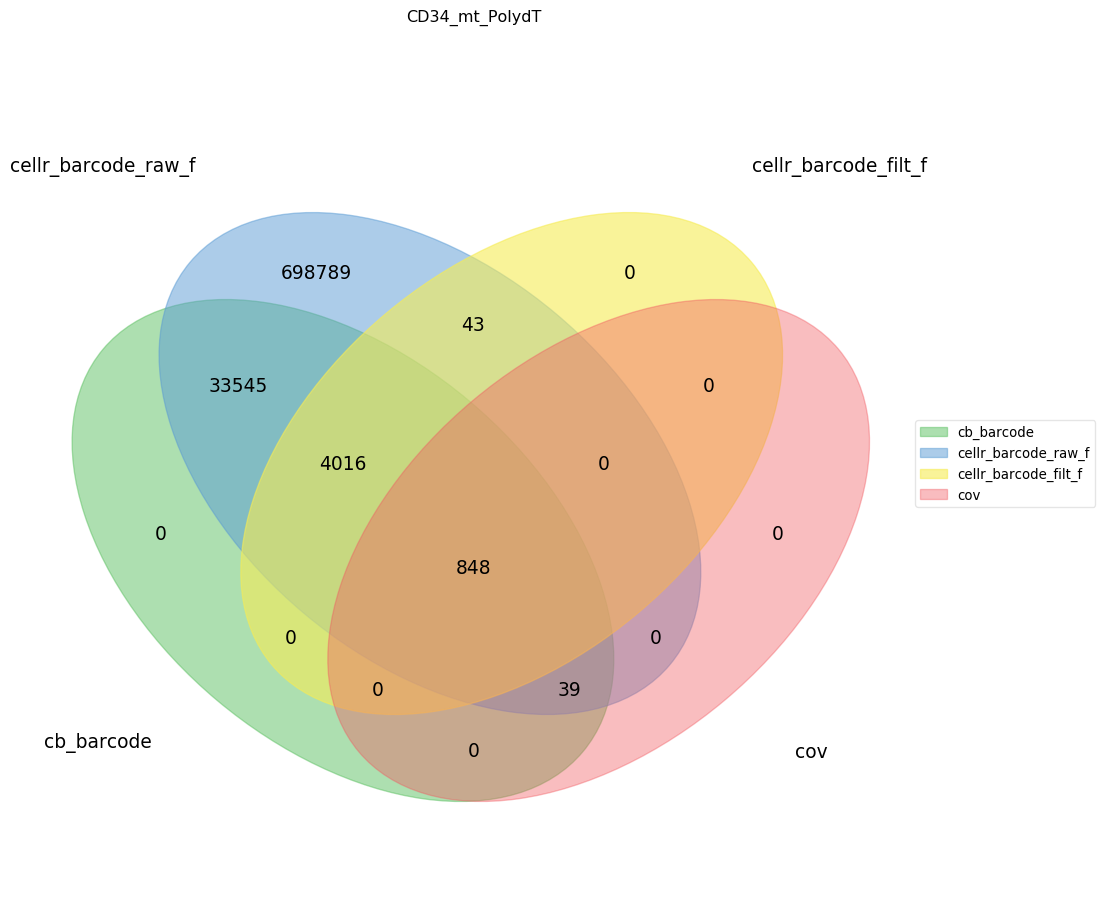

(163,)


<Figure size 432x288 with 0 Axes>

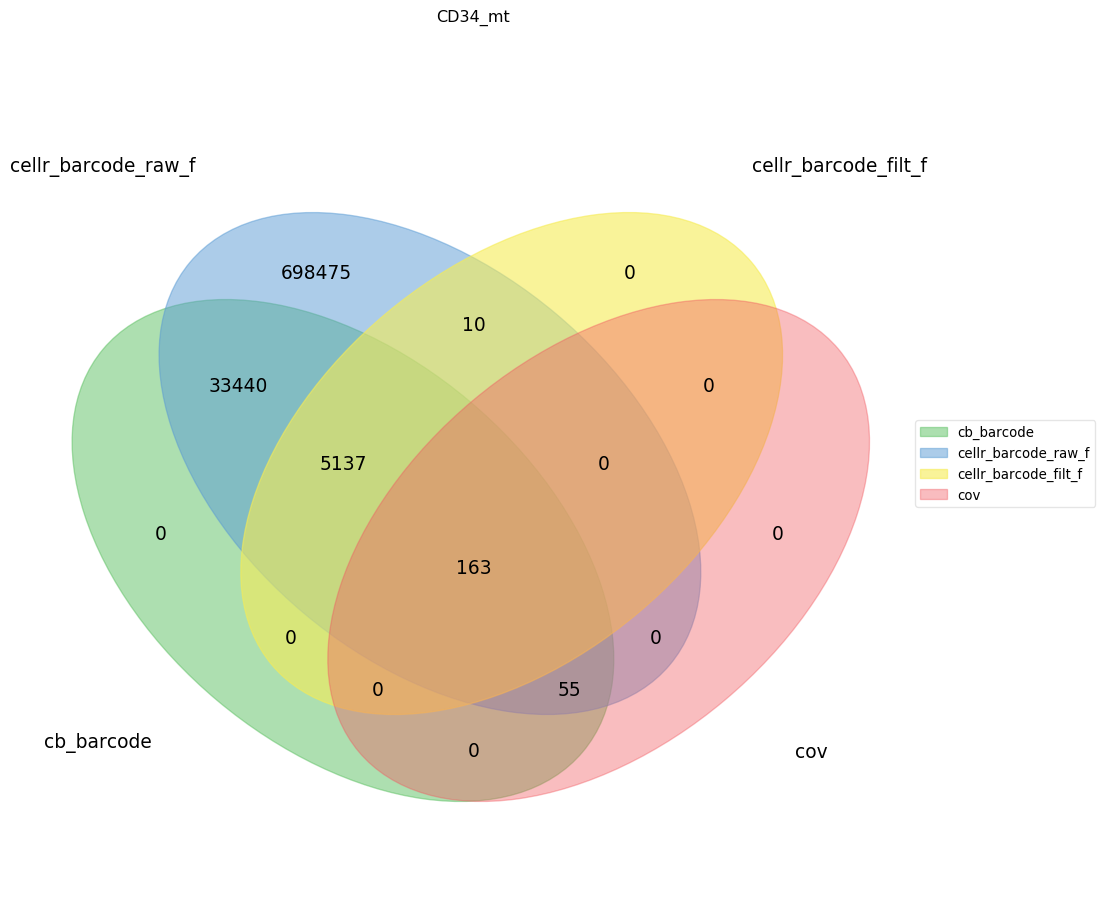

(48,)


<Figure size 432x288 with 0 Axes>

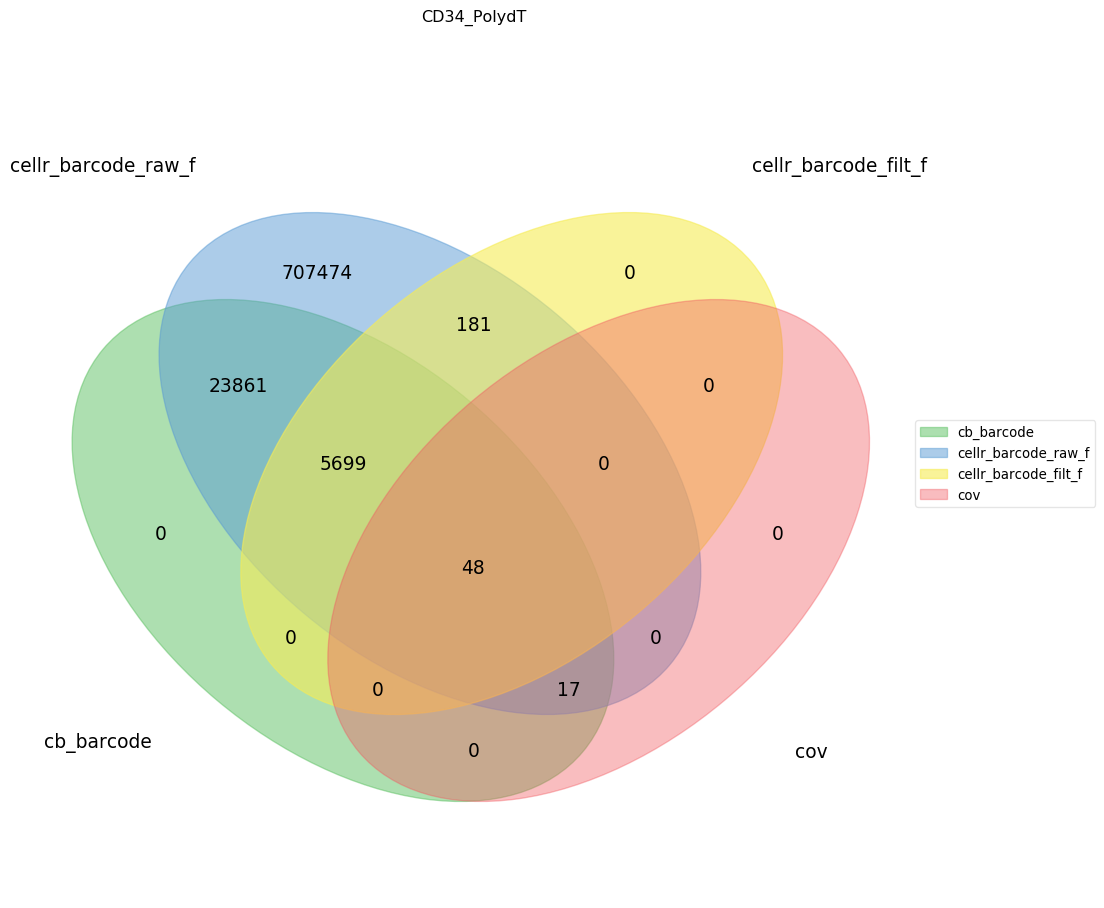

(180,)


<Figure size 432x288 with 0 Axes>

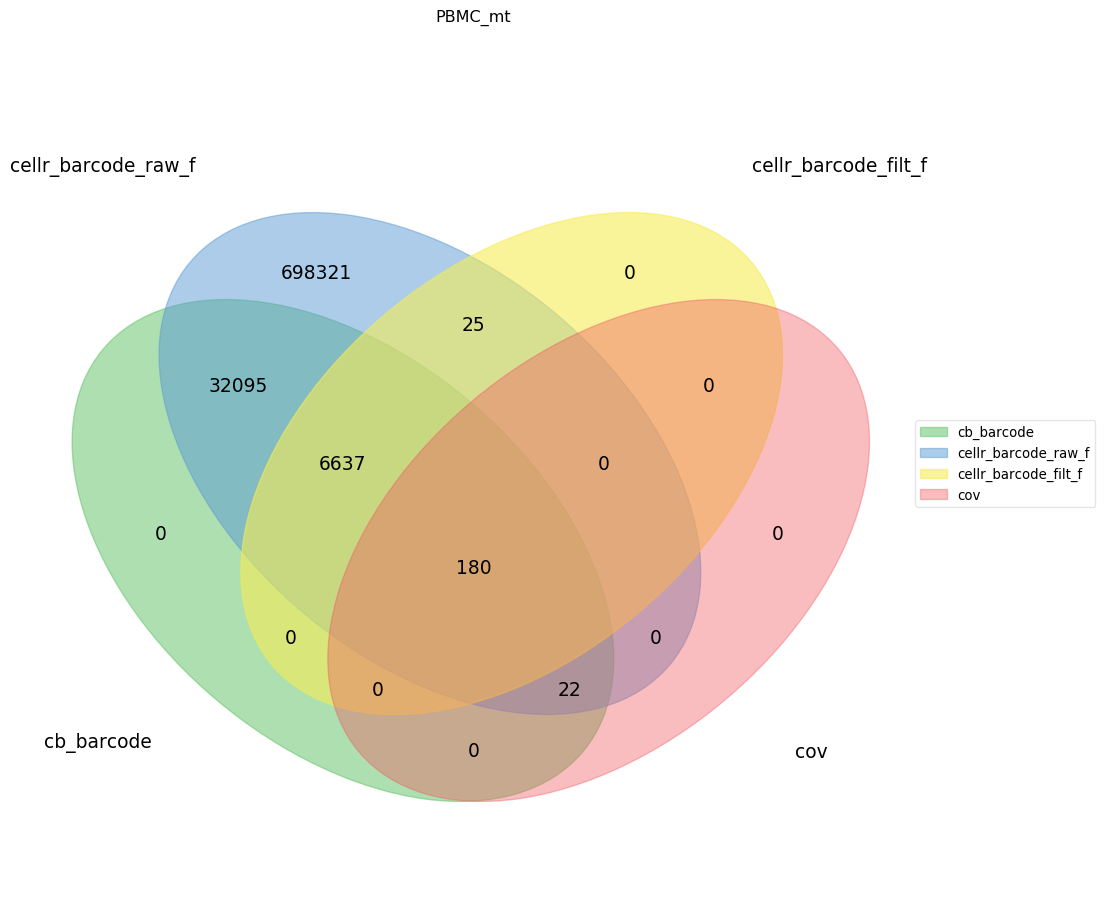

(200,)


<Figure size 432x288 with 0 Axes>

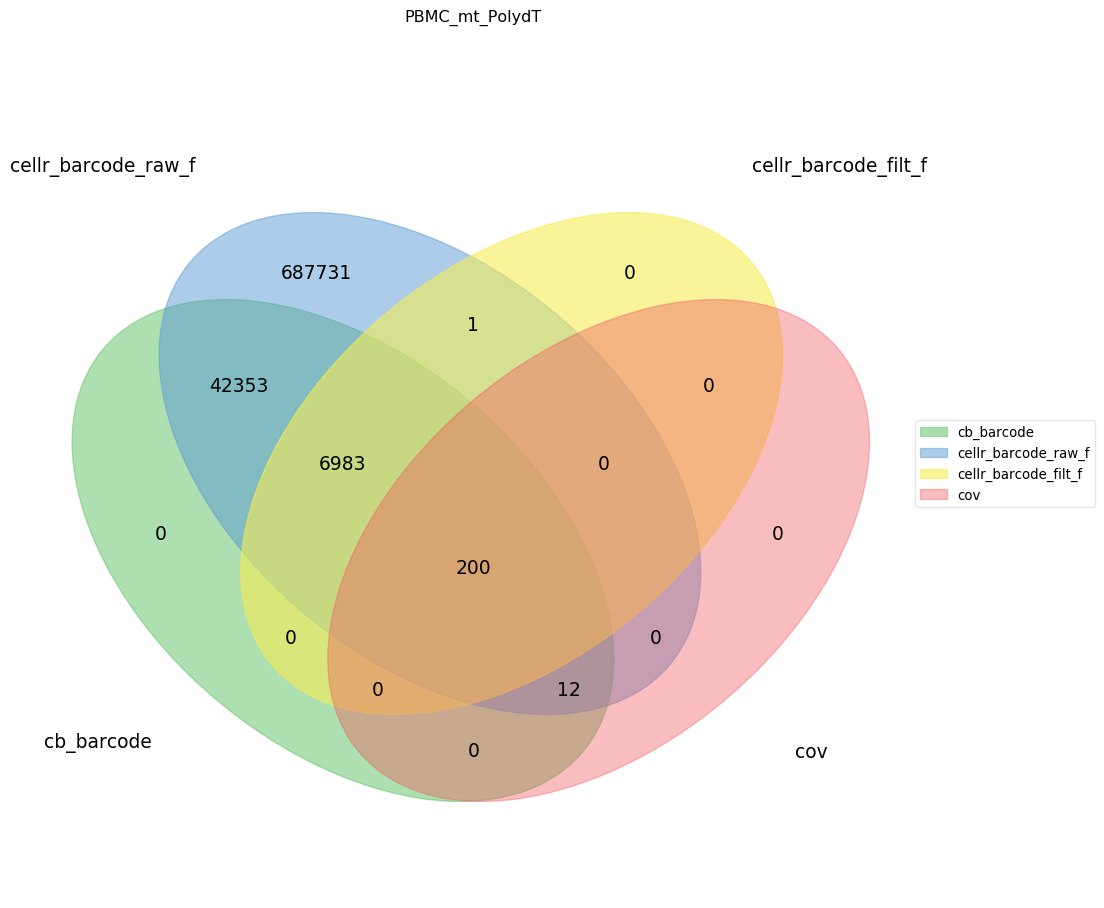

<Figure size 432x288 with 0 Axes>

In [6]:
%matplotlib inline
for ind,val in samples.iterrows():
    raw_bc_matrix = pd.read_csv(val['cellr_barcode_raw_f'],sep='\t', header=None)
    filt_bc_matrix = pd.read_csv(val['cellr_barcode_filt_f'],sep='\t', header=None)
    CR_read_number,CB_read_number,BC_read_number, barcodes, corrected_barcodes, barcode_pairs = pickle.load(open(val["cb_barcode_f"],'rb'))
    cov_df = pd.read_csv(val["cov_f"],header=None)
    cov_df.columns = ["Pos","Cell", "Coverage"]
    cov_df["Cell"] = cov_df["Cell"].apply(lambda x: x.replace(".bam",""))
    
    # Get cell as index and value is coverage
    cells_cov_df = cov_df.groupby("Cell").sum()["Coverage"].sort_values(ascending=False)
    
    # How many cell IDs from this group are in the raw and filtered barcode list
    print(cells_cov_df.loc[cells_cov_df.index.isin(filt_bc_matrix[0].values)].shape)
    
    cell_ids_dict = {'cb_barcode':list(CB_read_number.keys()), 
                     'cellr_barcode_raw_f': raw_bc_matrix[0].values, 
                     'cellr_barcode_filt_f':filt_bc_matrix[0].values, 
                     'cov': cells_cov_df.index.values} 
    
    labels = venn.get_labels(list(cell_ids_dict.values()), fill=['number'])

    fig, ax = venn.venn4(labels, names=list(cell_ids_dict.keys()),)
    plt.title(val['sample'])
    plt.show()
    plt.savefig(samples.at[ind,"venn_out_f"])

In [15]:
count = 0
CB_read_number_filt = {}
CB_read_number = old_CB_read_number.copy()
for x in filt_bc_matrix[0].values:
    if x not in set(CB_read_number.keys()):
        count += 1
        print(x)
        print('here')
    else:
        CB_read_number_filt[x] = CB_read_number[x]
        
CB_read_number = CB_read_number_filt.copy()
print(f"Number of missing barcodes in CB but present in filtered: {count}")
print(f"Number of cells after using cellranger cell filter: {len(CB_read_number_filt)}")

TATTACCGTAGCGCAA-1
here
Number of missing barcodes in CB but present in filtered: 1
Number of cells after using cellranger cell filter: 7183


### Only the barcode raw, filtered, and CB 

(2233,)


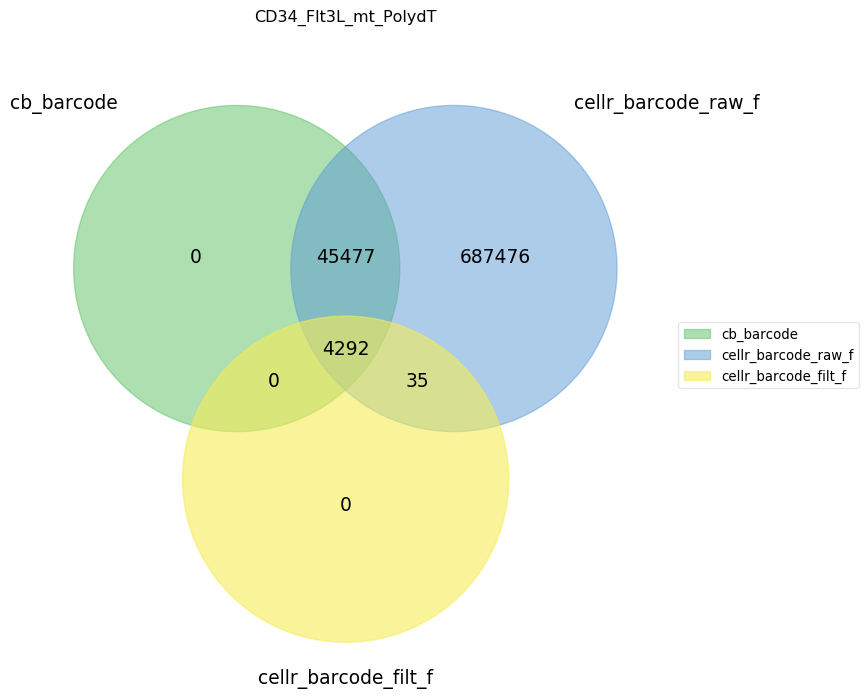

(4100,)


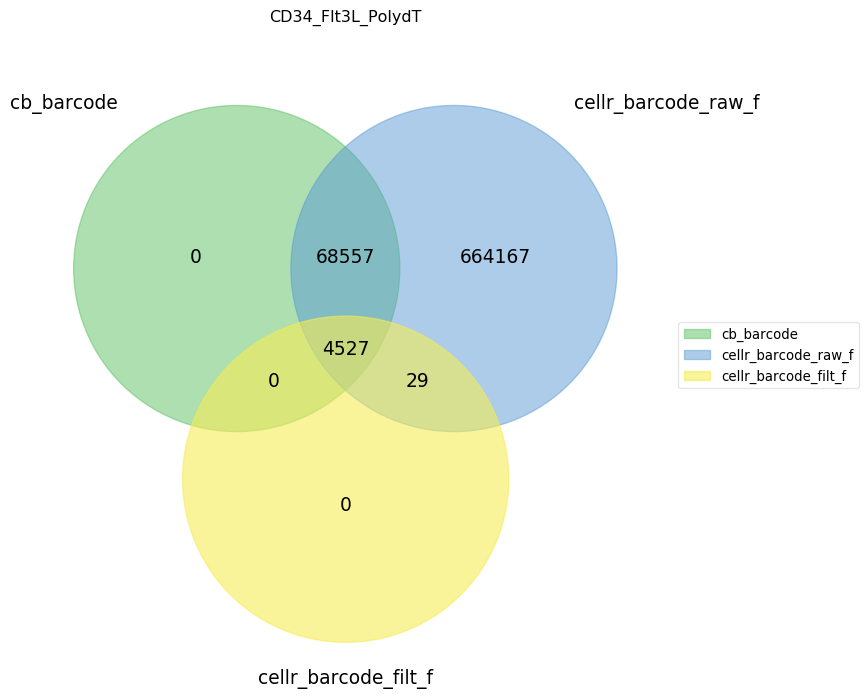

(833,)


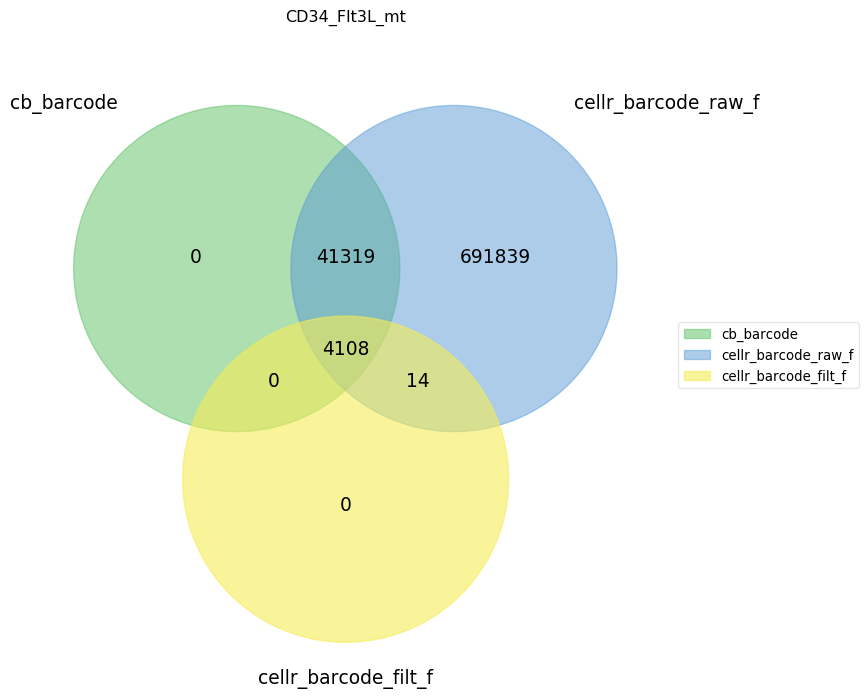

(848,)


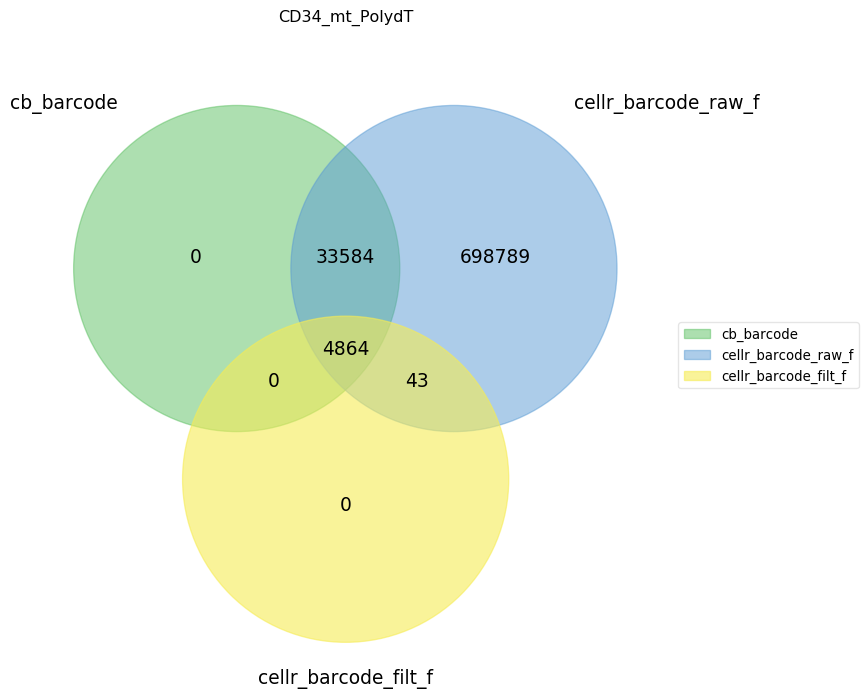

(163,)


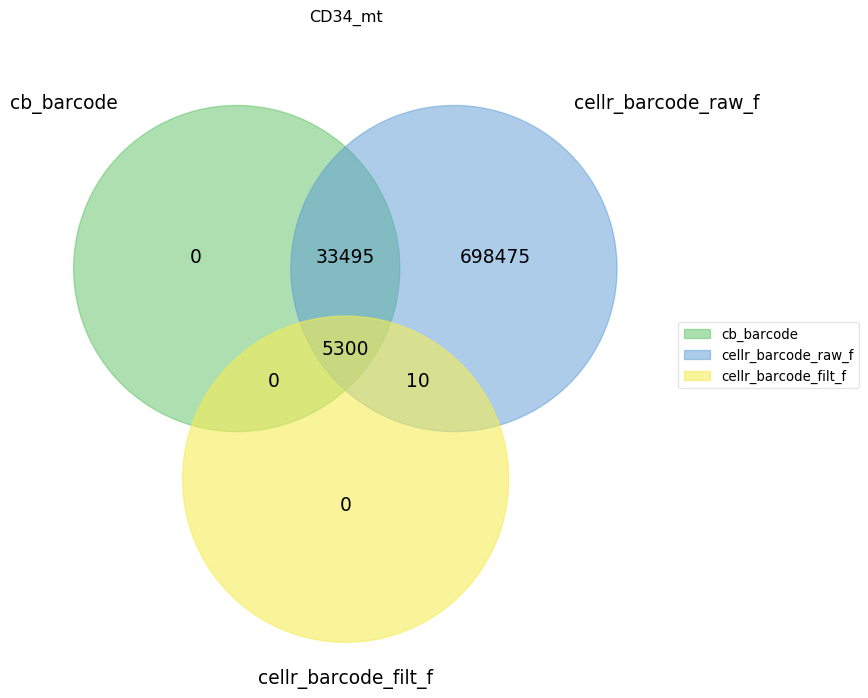

(48,)


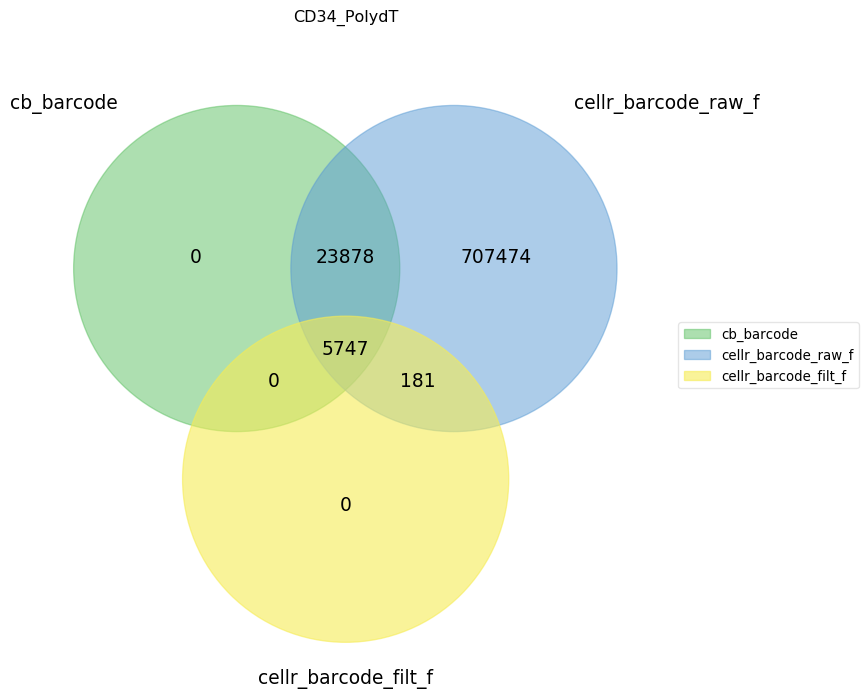

(180,)


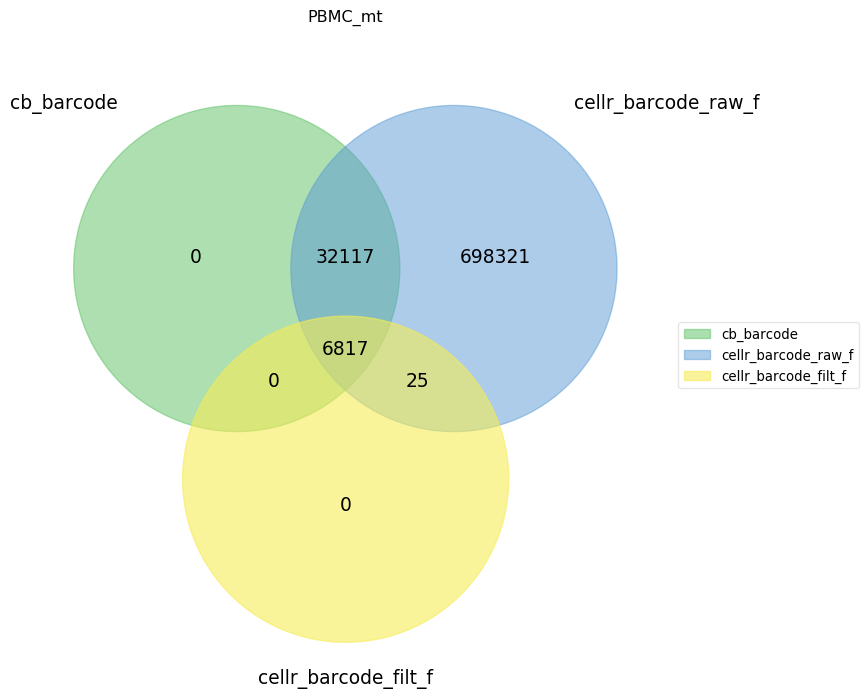

(200,)


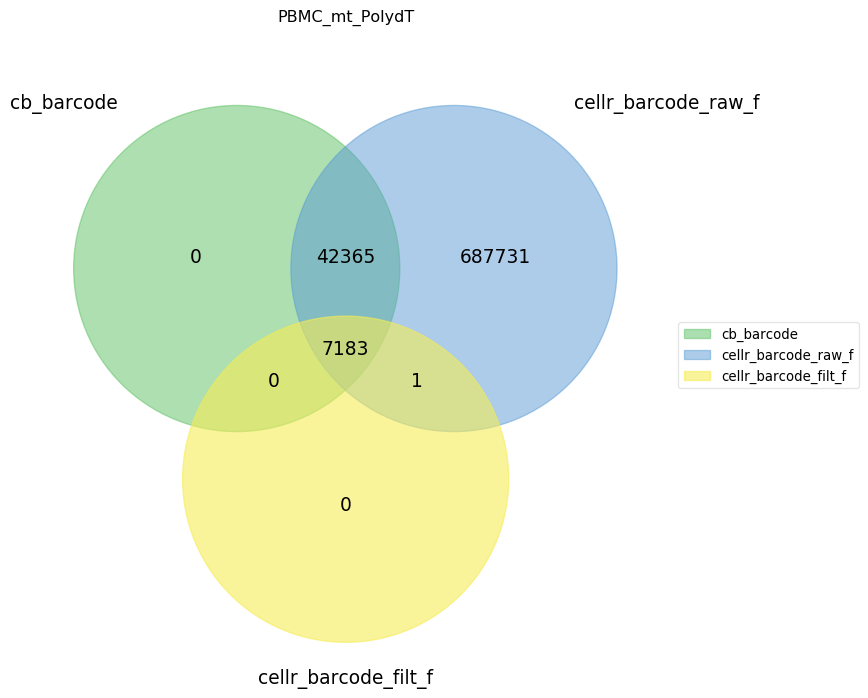

In [16]:
%matplotlib inline
for ind,val in samples.iterrows():
    raw_bc_matrix = pd.read_csv(val['cellr_barcode_raw_f'],sep='\t', header=None)
    filt_bc_matrix = pd.read_csv(val['cellr_barcode_filt_f'],sep='\t', header=None)
    CR_read_number,CB_read_number,BC_read_number, barcodes, corrected_barcodes, barcode_pairs = pickle.load(open(val["cb_barcode_f"],'rb'))
    cov_df = pd.read_csv(val["cov_f"],header=None)
    cov_df.columns = ["Pos","Cell", "Coverage"]
    cov_df["Cell"] = cov_df["Cell"].apply(lambda x: x.replace(".bam",""))
    
    # Get cell as index and value is coverage
    cells_cov_df = cov_df.groupby("Cell").sum()["Coverage"].sort_values(ascending=False)
    
    # How many cell IDs from this group are in the raw and filtered barcode list
    print(cells_cov_df.loc[cells_cov_df.index.isin(filt_bc_matrix[0].values)].shape)
    
    cell_ids_dict = {'cb_barcode':list(CB_read_number.keys()), 
                     'cellr_barcode_raw_f': raw_bc_matrix[0].values, 
                     'cellr_barcode_filt_f':filt_bc_matrix[0].values, } 
    
    labels = venn.get_labels(list(cell_ids_dict.values()), fill=['number'])

    fig, ax = venn.venn3(labels, names=list(cell_ids_dict.keys()),)
    plt.title(val['sample'])
    plt.show()

(2233,)


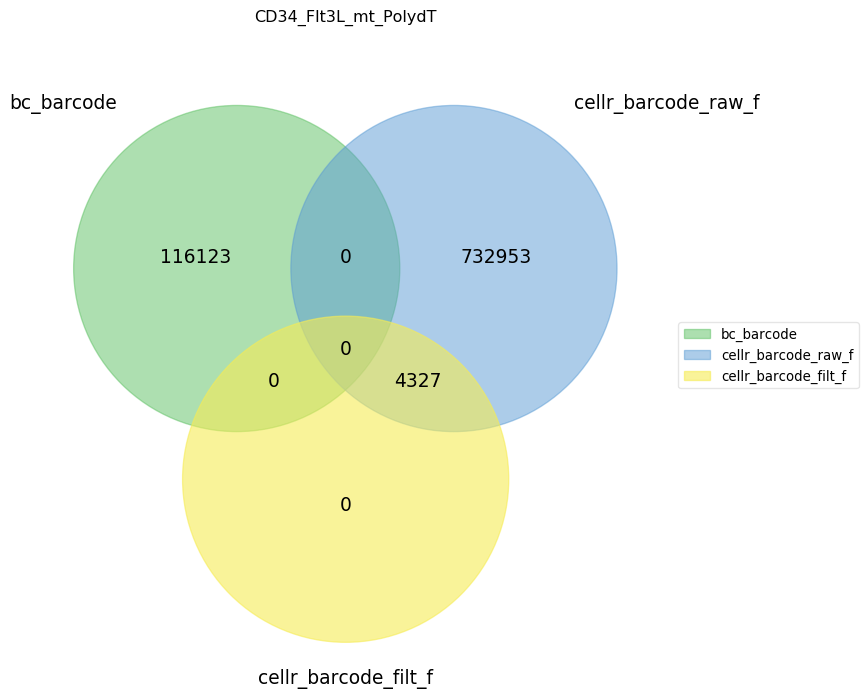

(4100,)


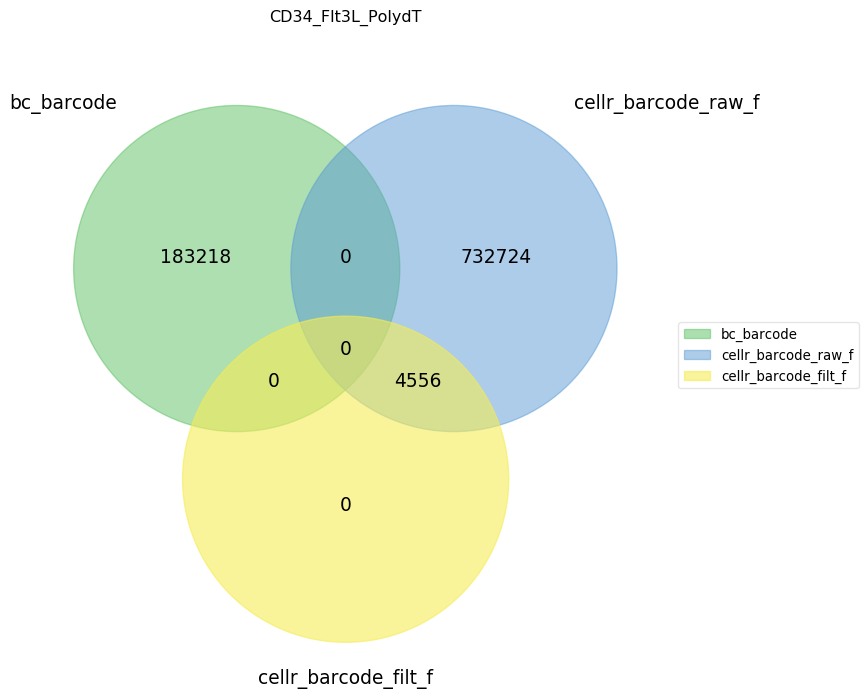

(833,)


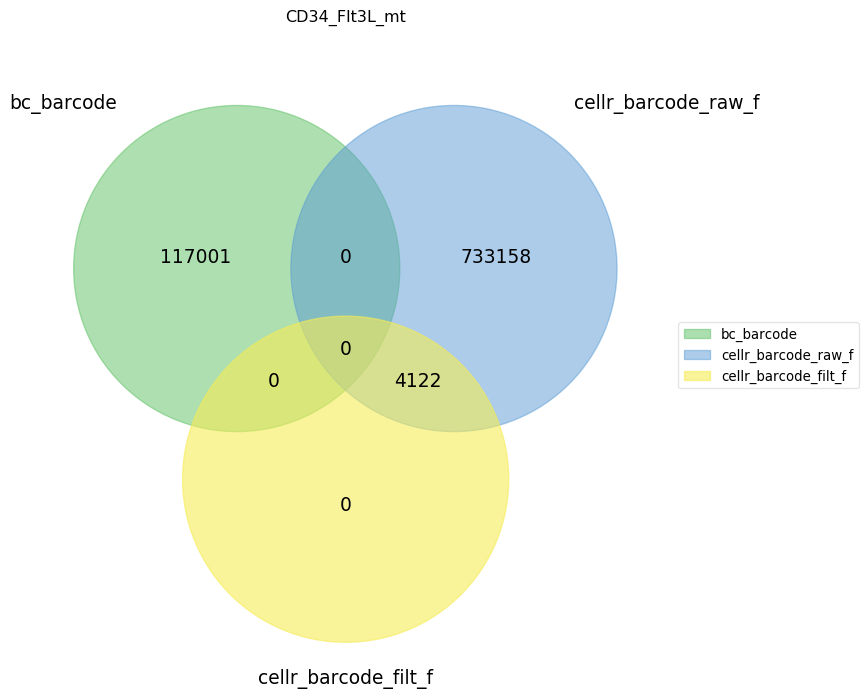

(848,)


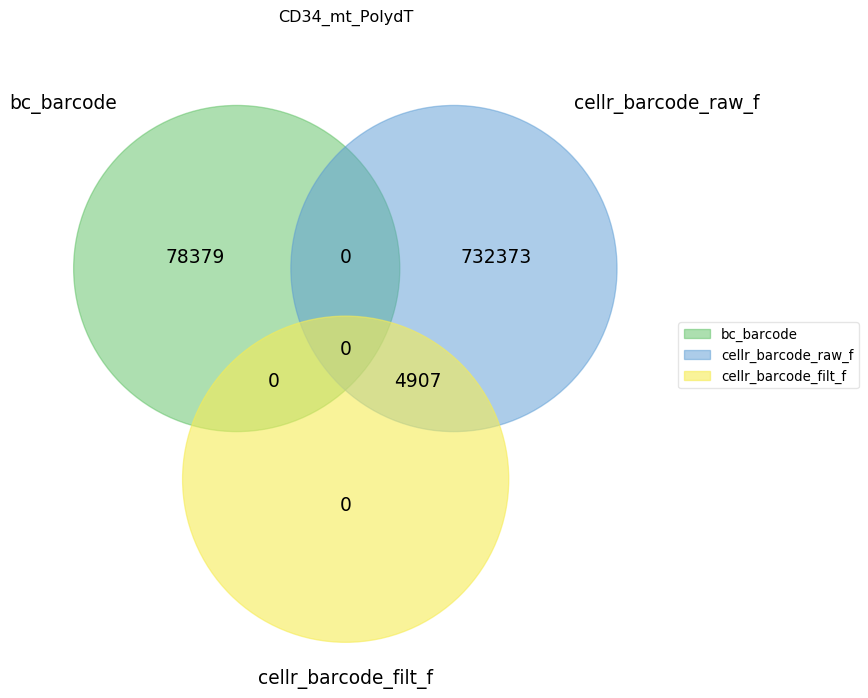

(163,)


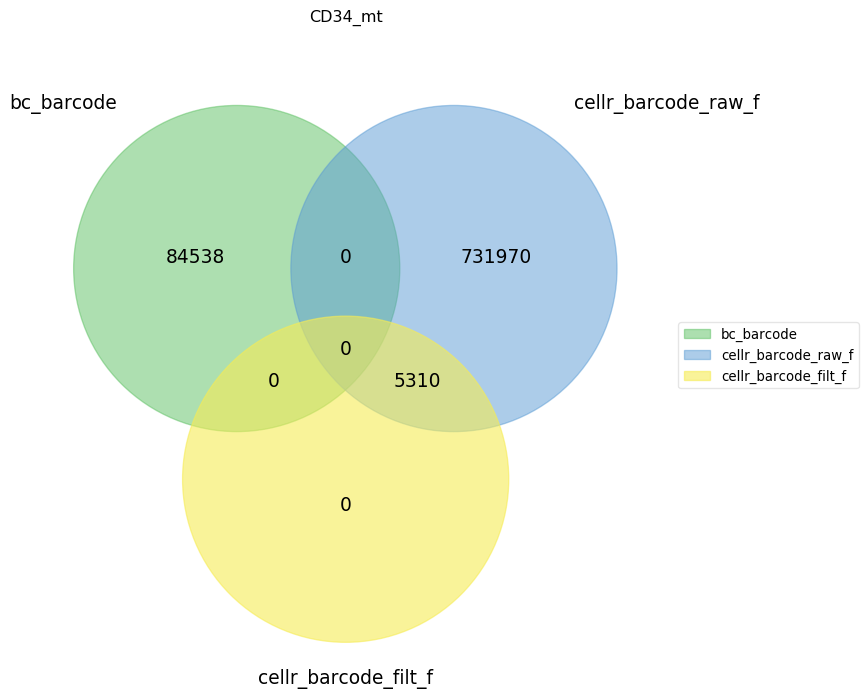

(48,)


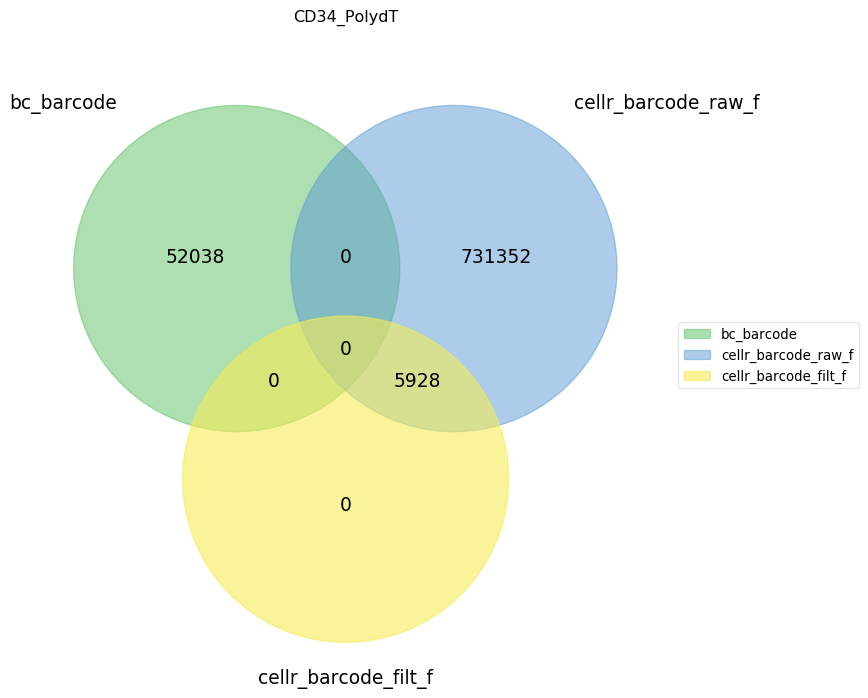

(180,)


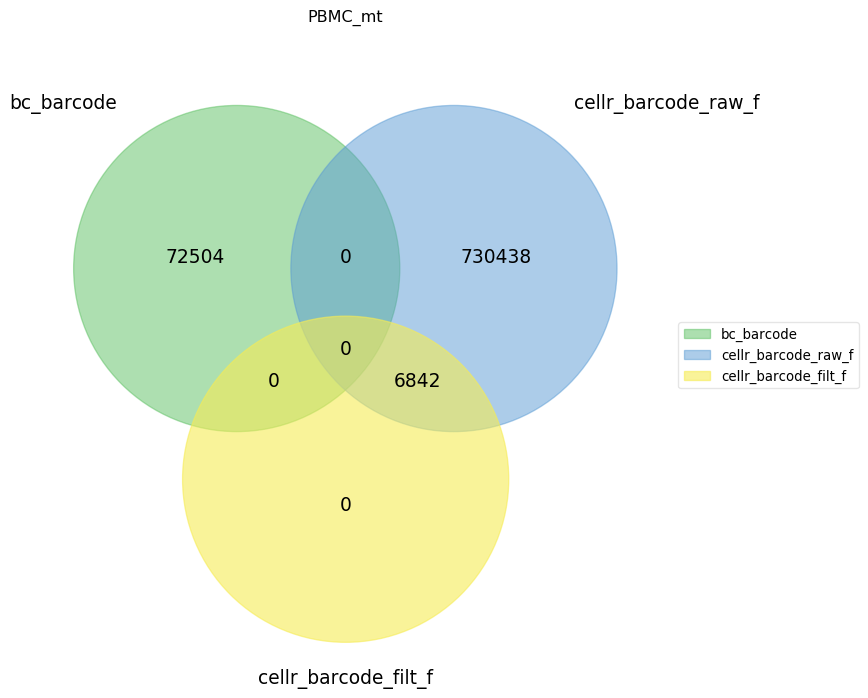

(200,)


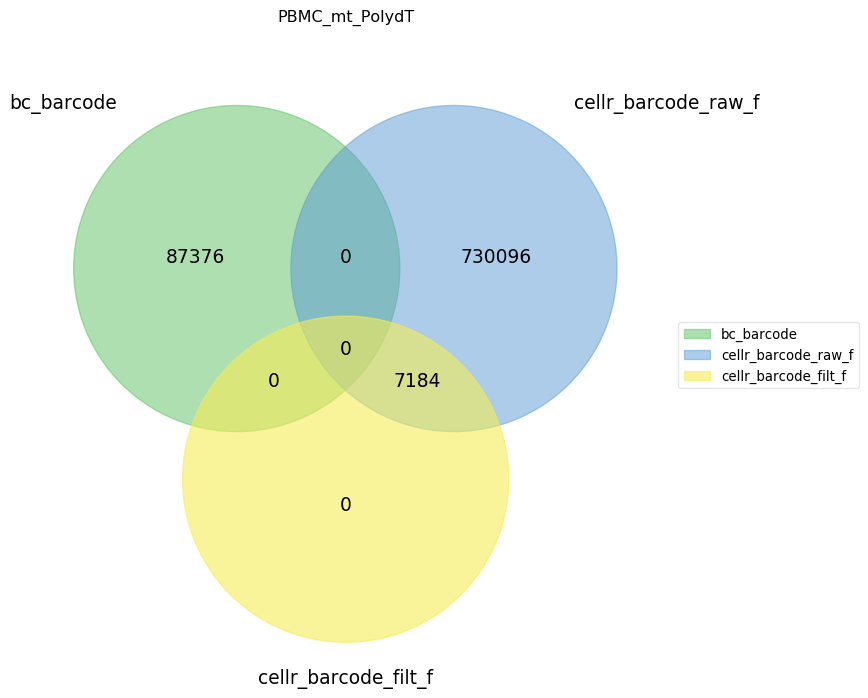

In [18]:
%matplotlib inline
for ind,val in samples.iterrows():
    raw_bc_matrix = pd.read_csv(val['cellr_barcode_raw_f'],sep='\t', header=None)
    filt_bc_matrix = pd.read_csv(val['cellr_barcode_filt_f'],sep='\t', header=None)
    CR_read_number,CB_read_number,BC_read_number, barcodes, corrected_barcodes, barcode_pairs = pickle.load(open(val["cb_barcode_f"],'rb'))
    cov_df = pd.read_csv(val["cov_f"],header=None)
    cov_df.columns = ["Pos","Cell", "Coverage"]
    cov_df["Cell"] = cov_df["Cell"].apply(lambda x: x.replace(".bam",""))
    
    # Get cell as index and value is coverage
    cells_cov_df = cov_df.groupby("Cell").sum()["Coverage"].sort_values(ascending=False)
    
    # How many cell IDs from this group are in the raw and filtered barcode list
    print(cells_cov_df.loc[cells_cov_df.index.isin(filt_bc_matrix[0].values)].shape)
    
    cell_ids_dict = {'bc_barcode':list(CR_read_number.keys()), 
                     'cellr_barcode_raw_f': raw_bc_matrix[0].values, 
                     'cellr_barcode_filt_f':filt_bc_matrix[0].values, } 
    
    labels = venn.get_labels(list(cell_ids_dict.values()), fill=['number'])

    fig, ax = venn.venn3(labels, names=list(cell_ids_dict.keys()),)
    plt.title(val['sample'])
    plt.show()

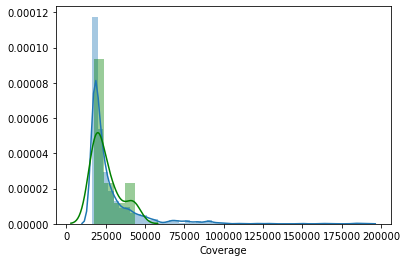

In [62]:
%matplotlib inline
sns.distplot(cells_cov_df)
sns.distplot(cells_cov_df.loc[cells_cov_df.index.isin(bc_matrix[0].values)], color='g')

In [7]:
from src.external.pyvenn import venn

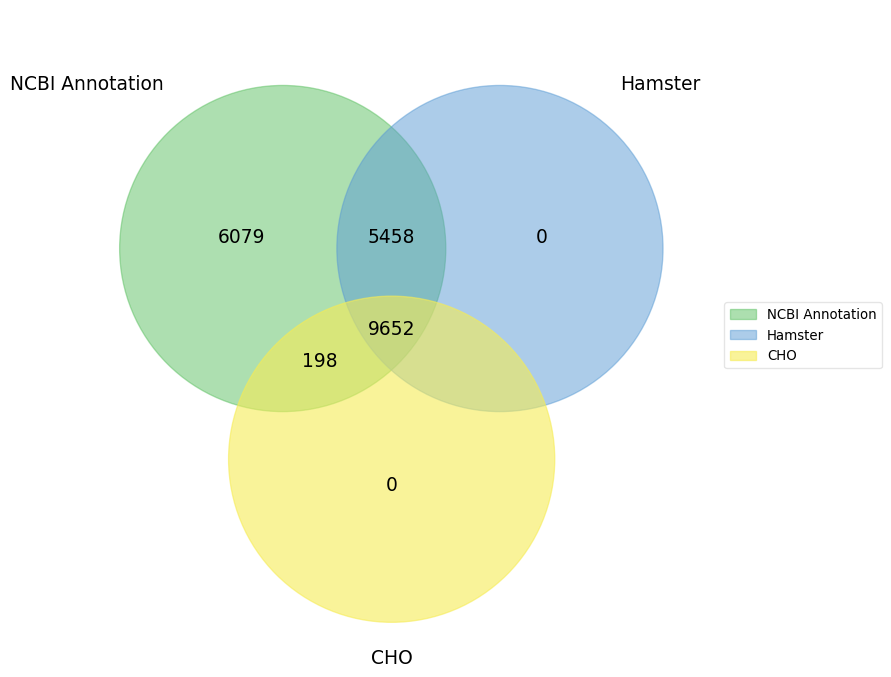

In [16]:
%matplotlib inline
labels = venn.get_labels(list(cell_ids_dict.values()), fill=['number'])
#'001', '010', '100',
labels = {'001':0,'010':0,'100':6079, '110':5458, '101':198, '111':9652}
names = {'001': 'CHO', '010': 'Tissues', '100': 'NCBI'}
fig, ax = venn.venn3(labels, names=['NCBI Annotation','Hamster','CHO'])